# Dynamic power flow

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from cvxpower import *

matplotlib.rc("figure", figsize=(16,6))
matplotlib.rc("lines", linewidth=2)

T = 100
p_load = np.sin(np.pi*np.arange(T)/T)

## Basic examples

### Time-varying load

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c4c149908>,
      dtype=object)

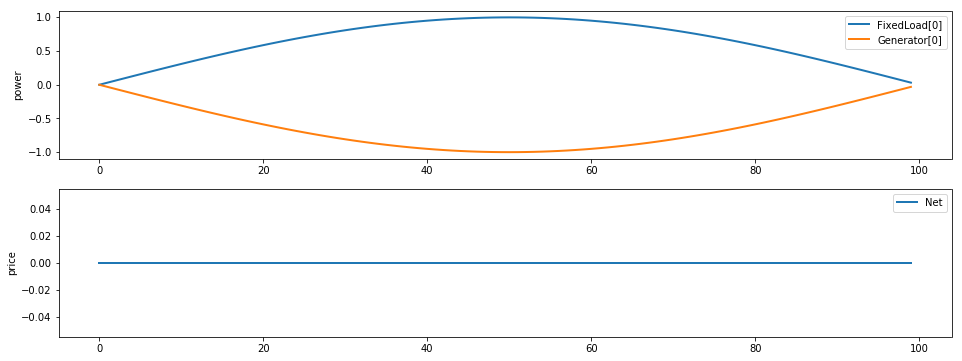

In [3]:
load = FixedLoad(power=p_load)
gen = Generator(power_max=2, power_min=-0.1, alpha=100, beta=100)
net = Net([load.terminals[0], gen.terminals[0]])
network = Group([load, gen], [net])

network.init_problem(time_horizon=T)
network.problem.solve()
network.results.plot()

### Storage

Text(0, 0.5, 'stored energy')

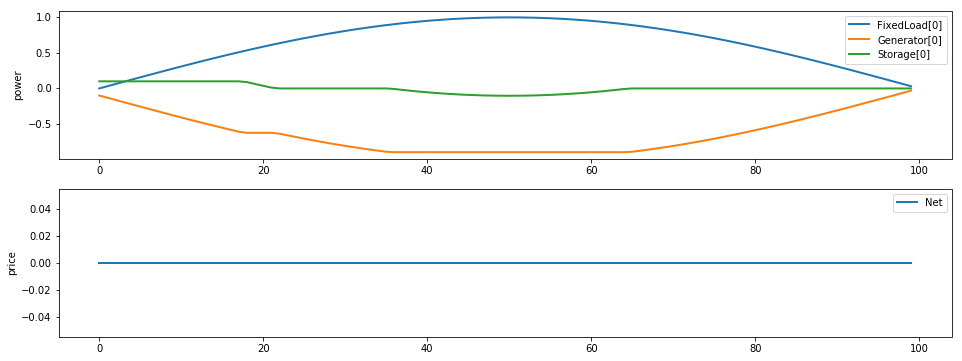

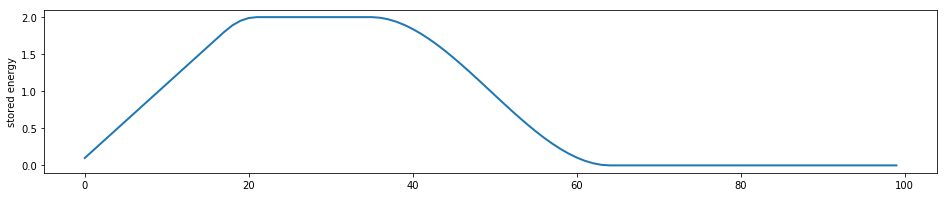

In [4]:
load = FixedLoad(power=p_load)
gen = Generator(power_max=2, alpha=100, beta=100)
storage = Storage(discharge_max=0.4, charge_max=0.1, energy_max=2)
net = Net([load.terminals[0], gen.terminals[0], storage.terminals[0]])
network = Group([load, gen, storage], [net])

network.init_problem(time_horizon=T)
network.problem.solve()
network.results.plot()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,3))
ax.plot(storage.energy.value)
ax.set_ylabel("stored energy")

Text(0, 0.5, 'stored energy')

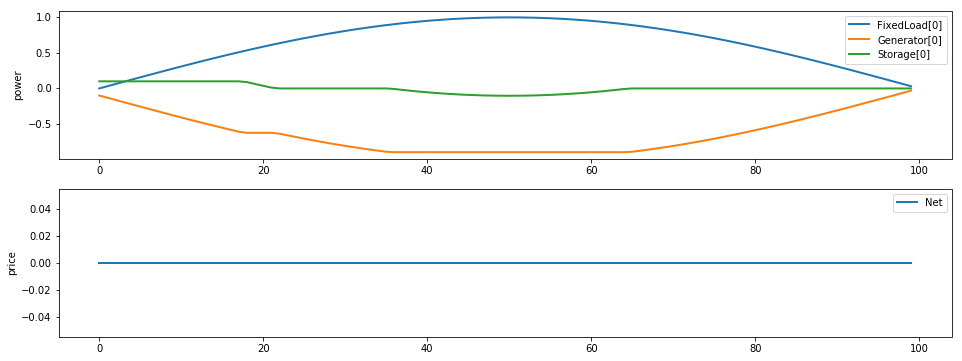

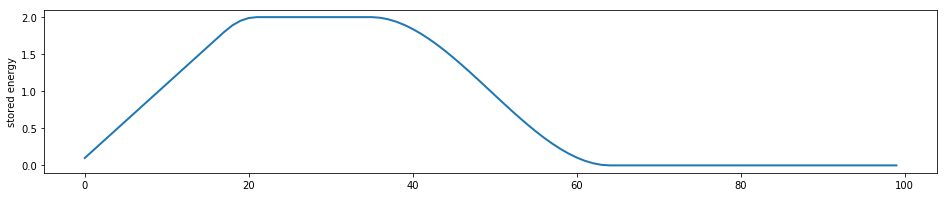

In [7]:
load = FixedLoad(power=p_load)
gen = Generator(power_max=2, alpha=100, beta=100)
storage = Storage(discharge_max=0.4, charge_max=0.1, energy_max=2)
net = Net([load.terminals[0], gen.terminals[0], storage.terminals[0]])
network = Group([load, gen, storage], [net])

network.init_problem(time_horizon=T)
network.problem.solve()
network.results.plot()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,3))
ax.plot(storage.energy.value)
ax.set_ylabel("stored energy")

### Deferrable load

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c4c08abe0>,
      dtype=object)

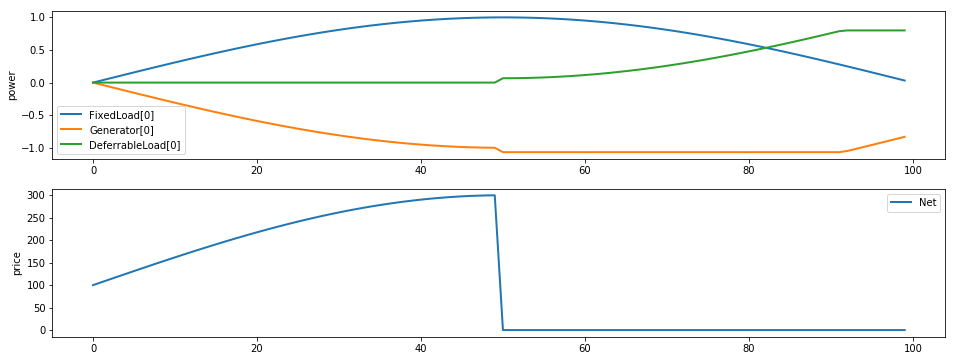

In [6]:
load = FixedLoad(power=p_load)
gen = Generator(power_max=2, alpha=100, beta=100)
deferrable = DeferrableLoad(time_start=50, energy=20, power_max=0.8)
net = Net([load.terminals[0], gen.terminals[0], deferrable.terminals[0]])
network = Group([load, gen, deferrable], [net])

network.init_problem(time_horizon=T)
network.problem.solve()
network.results.plot()

### Thermal load

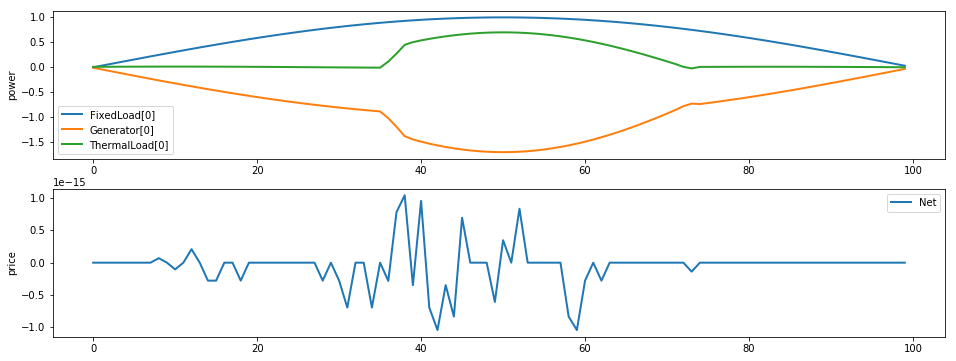

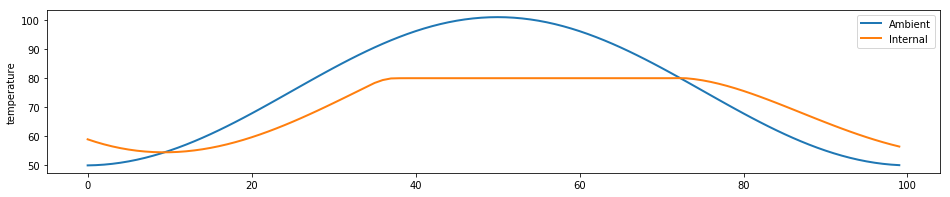

In [8]:
temp_amb = (np.sin(np.pi*np.arange(T)/T) + 1e-2).reshape(-1,1)**2*50+50

load = FixedLoad(power=p_load)
gen = Generator(power_max=2, alpha=100, beta=100)
thermal = ThermalLoad(
    temp_init=60, temp_amb=temp_amb, temp_min=None, temp_max=80,
    power_max=2, amb_conduct_coeff=0.1, efficiency=3, capacity=1)
net = Net([load.terminals[0], gen.terminals[0], thermal.terminals[0]])
network = Group([load, gen, thermal], [net])

network.init_problem(time_horizon=T)
network.problem.solve()
network.results.plot()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,3))
ax.plot(temp_amb, label="Ambient")
ax.plot(thermal.temp.value, label="Internal")
ax.set_ylabel("temperature")
ax.legend()